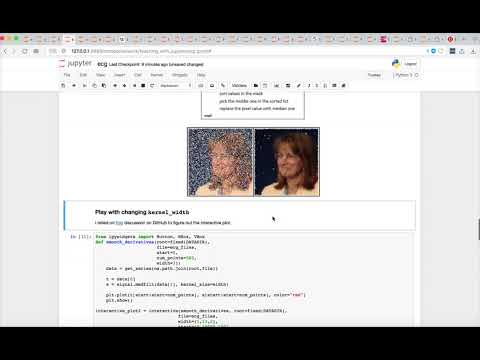

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo("CJkPW2wt6e8", width=800, height="600")

# Derivatives and ECG Signals

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import numpy.random as ra
import matplotlib.pyplot as plt
import pandas as pd
import os

from ipywidgets import interact, interactive, fixed
from IPython.display import clear_output, display
import ipywidgets as widgets

DATADIR = os.path.join(os.path.expanduser("~"),
                    "work",
                    "Physionet", "MITDB")
os.path.exists(DATADIR)

True

## What does an ECG Look LIke?
### Here is the perfect ECG
<img
src="https://goo.gl/l4Rlq8" alt="an ECG cartoon" width="384">

### Here are some *real* ECGs

In [14]:
ecg_files = os.listdir(DATADIR)

In [17]:
def get_series(f):
    
    data = \
    pd.read_table(f, header=None).apply(
        lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
    return data
def _view_series(root="", f="", num_points=200, color="red"):
    data = get_series(os.path.join(root,f))
    plt.plot(data[1][:num_points], color=color)
    plt.show()
interactive_plot = interactive(_view_series, root=fixed(DATADIR), 
                               f=ecg_files, 
                               num_points=(100, 10000, 50),
                               color=["red", "purple", "blue"])
output = interactive_plot.children[-1]
output.layout.height = '250px'
interactive_plot


## Hiding code details with a module

In [18]:
import ecg

interactive_plot = interactive(ecg._view_series, root=fixed(DATADIR), 
                               f=ecg_files, 
                               num_points=(200, 10000, 50),
                               color=["red", "green", "blue"])
output = interactive_plot.children[-1]
output.layout.height = '250px'
interactive_plot


### What do the raw data look like?

In [19]:
data = get_series(os.path.join(DATADIR, "100.txt"))
data.head()

,0,1,2
0,-0.500000,0.038867,0.034156
1,-0.499998,0.038867,0.034156
2,-0.499997,0.038867,0.034156
3,-0.499995,0.038867,0.034156
4,-0.499994,0.038867,0.034156


## Controlling figure layout with [subplots](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplots)

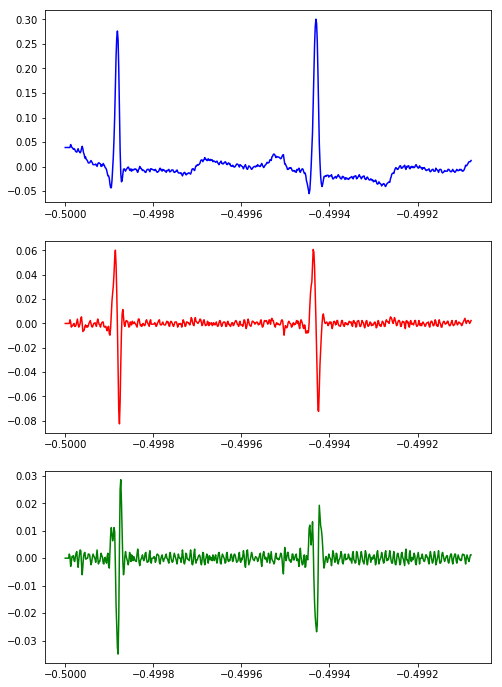

In [20]:
f, ax = plt.subplots(3,1)
f.set_size_inches(8,12)
t = data[0][:600]
s = data[1][:600]
ax[0].plot(t, s, 'b')
ax[1].plot(t, np.gradient(s), 'r')
ax[2].plot(t, np.gradient(np.gradient(s)), 'g')

## The Data are Noisy 
#### Computing derivatives tends to be sensitive to noise
#### Try smoothing first

The SciPy package has a number of functions for smoothing signals and images. The [signal](http://docs.scipy.org/doc/scipy/reference/signal.html) module includes common one-dimensional filtering functions. The [ndimage.filters](scipy.ndimage.filters) module includes a number of functions for smoothing N-dimensional signals; the name is derived from 2D signals (images).

In [21]:
import scipy.signal as signal
import scipy.ndimage.filters as filters

#### We will explore two smooth functions

* [Median smoothing](http://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.medfilt.html#scipy.signal.medfilt)
* [Gaussian smoothing](http://docs.scipy.org/doc/scipy-0.16.1/reference/generated/scipy.ndimage.filters.gaussian_filter.html)

### Median Filtering

#### What is the median of 

* 1, 5, 3, 7, 2?

Median filtering is a kind of non-linear filtering that is good at preserving edges and other discontinuities in the data. The [medfilter]() function takes a positional argument that is the signal that you want to filter (smooth) and a keyword argument ``kernel_size`` (default 3) that defines how many points you want to use to calculate the median.

![Median Filter algorithm](https://upload.wikimedia.org/wikipedia/commons/f/f4/Median_filter_pseudocode.png)

![Example median filter](https://upload.wikimedia.org/wikipedia/commons/1/1d/Medianfilterp.png)

### Play with changing `kernel_width`

I relied on [this](https://github.com/jupyter-widgets/ipywidgets/issues/1198) discussion on GitHub to figure out the interactive plot.

In [22]:
from ipywidgets import Button, HBox, VBox
def smooth_derivatives(root=fixed(DATADIR), 
                       file=ecg_files,
                       start=0,
                       num_points=500,
                       width=3):
    data = get_series(os.path.join(root,file))

    t = data[0]
    s = signal.medfilt(data[1], kernel_size=width)

    plt.plot(t[start:start+num_points], s[start:start+num_points], color="red")
    plt.show()

interactive_plot2 = interactive(smooth_derivatives, root=fixed(DATADIR), 
                               file=ecg_files, 
                               width=(1,13,2),
                               start=(0,10000,100),
                               num_points=(200, 10000, 50))
h1 = HBox([interactive_plot2.children[0], interactive_plot2.children[1]])
h2 = HBox([interactive_plot2.children[3], interactive_plot2.children[2]])
v1 = VBox([h1, h2, interactive_plot2.children[-1]])
display(v1)
interactive_plot2.update()

### Gaussian Smoothing

The [``gaussian_filter``](). Smoothing with the Gaussian function is described as a convolution of the original signal with a Gaussian function.

### What is convolution

![Visualization of convolution](https://goo.gl/FWGliL)

Convolutions is a function that takes as input two signals ($f$) and ($g$) and returns as output a new signal that is obtained by  
1. flipping $f$
1. shifting $g1$
2. multiplying the shifted and flipped $f$ by $g$.
1. summing up the value sof the multiplication.

This can be written mathematically as

$$
(f * g)(t) \overset{\Delta}{=} \int_{-\infty}^\infty f(t-\tau)g(\tau)d\tau
$$

### What is a [Gaussian](https://en.wikipedia.org/wiki/Gaussian_function)

The Gaussian is a function that you will encounter over and over.

SciPy has a [Gaussian window function](http://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.gaussian.html)

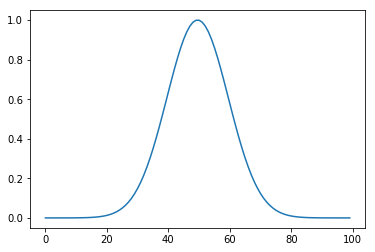

In [12]:
plt.plot(signal.gaussian(100,10))

### Why might this be a good function for smoothing?

### Make an Interactive Exploration of the Gaussian Derivatives

* Use the [scipy.ndimage.filters.gaussian_filter](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.ndimage.gaussian_filter.html#scipy.ndimage.gaussian_filter)

In [23]:
from ipywidgets import Button, HBox, VBox
def scalespace(root=fixed(DATADIR), 
                               file=ecg_files, 
                               num_points=500,
                               gaussian_width=0.1,
                               filter_order=0):
    data = get_series(os.path.join(root,file))
    t = data[0]
    s = data[1]
    plt.plot(t[:num_points], 
             filters.gaussian_filter(s, gaussian_width, order=filter_order)[:num_points], 
             'b')
    plt.show()

interactive_plot3 = interactive(scalespace, root=fixed(DATADIR), 
                               file=ecg_files, 
                               gaussian_width=(0.5,4,0.2),
                               filter_order=[0,1,2],
                               num_points=(200, 10000, 50))

h1b = HBox([interactive_plot3.children[0], interactive_plot3.children[3]])
h2b = HBox([interactive_plot3.children[1], interactive_plot3.children[2]])
v1b = VBox([h1b, h2b, interactive_plot3.children[-1]])
display(v1b)
interactive_plot3.update()